# **DECISION TREE IMPLEMENTATION**
TASK : 1

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

Confusion Matrix:
 [[50  0]
 [ 0 34]]


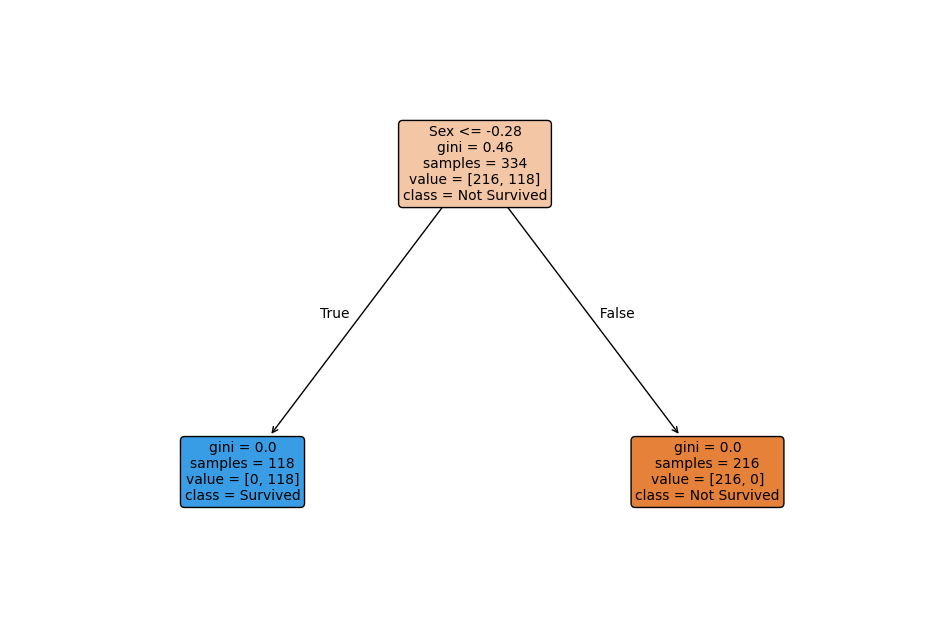

<Figure size 640x480 with 0 Axes>

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import zipfile
import os

# Extract dataset from uploaded ZIP file
dataset_zip_path = "/content/archive (1).zip"
data_folder = "/mnt/data/titanic_data"

if not os.path.exists(data_folder):
    os.makedirs(data_folder)

with zipfile.ZipFile(dataset_zip_path, "r") as zip_ref:
    zip_ref.extractall(data_folder)

# Find CSV file in extracted folder
csv_file = None
for file in os.listdir(data_folder):
    if file.endswith(".csv"):
        csv_file = os.path.join(data_folder, file)
        break

if csv_file is None:
    raise FileNotFoundError("No CSV file found in the uploaded dataset.")

# Load the dataset
df = pd.read_csv(csv_file)

# Ensure 'Survived' column is categorical
df['Survived'] = df['Survived'].astype(int)

# Handling missing values
df.fillna(df.median(numeric_only=True), inplace=True)
df.fillna("Unknown", inplace=True)

# Encoding categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

## Normalizing numerical data, but exclude 'Survived'
numerical_features = df.select_dtypes(include=['number']).columns.difference(['Survived'])
df[numerical_features] = scaler.fit_transform(df[numerical_features])


# Splitting the dataset
X = df.drop(columns=['Survived'])
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42, max_depth=4)
dt_model.fit(X_train, y_train)

# Predictions
y_pred = dt_model.predict(X_test)

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Set the figure size for better visibility
plt.figure(figsize=(12, 8))

# Assuming 'dt_model' from the previous cell is the intended model
model = dt_model

# Plot the decision tree with improved aesthetics
plot_tree(model,
          feature_names=X.columns,
          class_names=['Not Survived', 'Survived'],
          filled=True,
          rounded=True,
          fontsize=10,
          precision=2)

# Display the plot
plt.show()
plt.savefig('decision_tree.png')
